In [3]:
#Listing 4.3
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

#size = (input size * hidden layers + hidden layers * output size) + (hidden layers + output size)
#size = (16 * 16 + 16 * 1) + (16 + 1)
size = (4 * 4 + 4 * 1) + (4 + 1)
print('Size: ', size)

Epoch 1/20
15/15 [==============================] - 1s 52ms/step - loss: 0.5653 - acc: 0.7369 - val_loss: 0.4544 - val_acc: 0.8390
Epoch 2/20
15/15 [==============================] - 0s 23ms/step - loss: 0.3801 - acc: 0.8823 - val_loss: 0.3795 - val_acc: 0.8579
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 0.2882 - acc: 0.9158 - val_loss: 0.3160 - val_acc: 0.8861
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 0.2400 - acc: 0.9269 - val_loss: 0.2919 - val_acc: 0.8898
Epoch 5/20
15/15 [==============================] - 0s 23ms/step - loss: 0.2017 - acc: 0.9383 - val_loss: 0.2863 - val_acc: 0.8883
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1659 - acc: 0.9520 - val_loss: 0.2910 - val_acc: 0.8831
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1522 - acc: 0.9533 - val_loss: 0.2830 - val_acc: 0.8865
Epoch 8/20
15/15 [==============================] - 0s 22ms/step - loss: 0.1305 - a

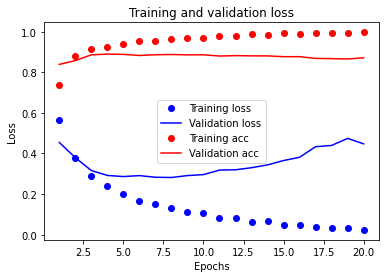

In [4]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()